  ###  <center>Name - Ashish Kumar  
### <center> Email - ashishok88@gmail.com 
### <center> Group - AI-07-BSP7 
### <center> AI Major Project Smartknower  -> <i> A Deep learning model to predict the different CIFAR10 images</i>
###  <center>Date - 18-08-2022
<br>

#### <b>Importing the Datasets</b>

In [23]:
from array import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from keras.datasets import cifar10
import cv2
from array import array 

#### <b>Train and Test split of Data</b>

In [24]:
(x_tr, y_tr),(x_te, y_te) = cifar10.load_data()

In [26]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)   

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


#### Displaying the Coloured(RGB) Image

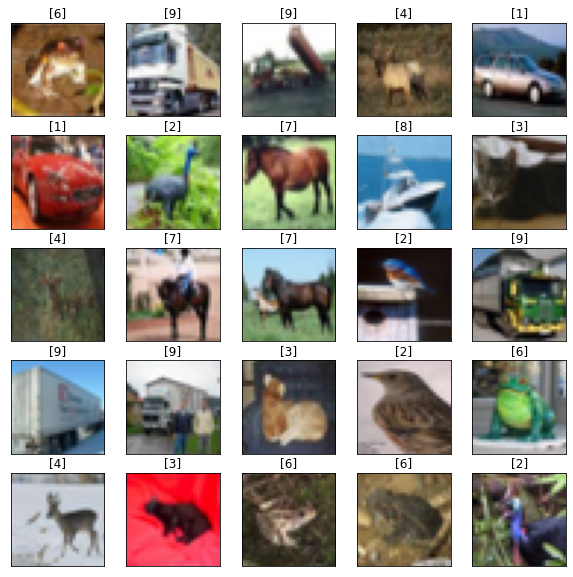

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # a = x_train[i]
    # x_trai = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
    # plt.imshow(x_trai,'gray')
    plt.imshow(x_tr[i],'gray')
    plt.title(y_tr[i])
plt.show()

In [28]:
print(x_tr[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


#### Reshaping the <i>      RGB_Image(n,32,32,3)     </i> to <i>     Grayscale Image(n,32,32)  </i>

In [29]:
x_train = np.mean(x_tr,axis=3)
x_test= np.mean(x_te,axis=3)
y_train = np.mean(y_tr,axis=1)
y_test= np.mean(y_te,axis=1)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(50000, 32, 32)
(10000, 32, 32)
(50000,)
(10000,)


In [31]:
y_train[:10]

array([6., 9., 9., 4., 1., 1., 2., 7., 8., 3.])

In [32]:
y_test[:10]

array([3., 8., 8., 0., 6., 6., 1., 6., 3., 1.])

In [33]:
y_train = ([int(a) for a in y_train])
y_test = [int(a) for a in y_test]
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

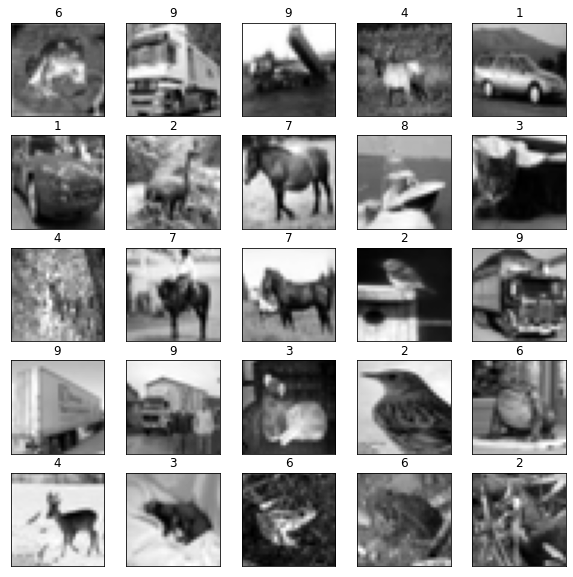

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # a = x_train[i]
    # x_trai = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
    # plt.imshow(x_trai,'gray')
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

##### <i>Before Normalization </i>

In [35]:
print(x_train[0])

[[ 61.33333333  44.66666667  47.         ... 132.66666667 126.33333333
  125.        ]
 [ 18.66666667   0.           8.66666667 ...  88.66666667  84.
   88.66666667]
 [ 23.33333333   7.66666667  28.         ...  84.          84.66666667
   74.66666667]
 ...
 [158.         129.33333333 128.33333333 ... 121.          31.33333333
   35.66666667]
 [138.33333333 112.66666667 120.         ... 142.          64.33333333
   56.66666667]
 [145.66666667 130.33333333 136.         ... 180.         117.66666667
   95.66666667]]


### <center>Normalizing the datasets

In [36]:
x_train = x_train/255.0
x_test = x_test /255.0

##### <i>After Normalization </i>
 

In [37]:
print(x_train[0])

[[0.24052288 0.1751634  0.18431373 ... 0.52026144 0.49542484 0.49019608]
 [0.07320261 0.         0.03398693 ... 0.34771242 0.32941176 0.34771242]
 [0.09150327 0.03006536 0.10980392 ... 0.32941176 0.33202614 0.29281046]
 ...
 [0.61960784 0.50718954 0.50326797 ... 0.4745098  0.12287582 0.13986928]
 [0.54248366 0.44183007 0.47058824 ... 0.55686275 0.25228758 0.22222222]
 [0.57124183 0.51111111 0.53333333 ... 0.70588235 0.46143791 0.3751634 ]]


In [38]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
# x_train = x_train.reshape(5000,32,32,1)
# x_test = x_test.reshape(1000,32,32,1)
x_train.shape


(50000, 32, 32, 1)

In [39]:
print(y_train)
print(y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


<br> 

## <center><i>Building the Model</i>

In [40]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.python.keras.callbacks import EarlyStopping

In [41]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),input_shape = (32,32,1),activation ="relu"))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation ="relu"))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dropout(0.20))
m1.add(Dense(64,activation='relu'))
m1.add(Dropout(0.20))
m1.add(Dense(32,activation='relu'))
m1.add(Dropout(0.20))
m1.add(Dense(10,activation='softmax'))

 

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
es = EarlyStopping(monitor='val_loss',patience=5)

In [43]:
m1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [44]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[es])

Epoch 1/30
1563/1563 [==============================] - 63s 40ms/step - loss: 1.8484 - accuracy: 0.3166 - val_loss: 1.5810 - val_accuracy: 0.4368
Epoch 2/30
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5667 - accuracy: 0.4432 - val_loss: 1.3851 - val_accuracy: 0.5068
Epoch 3/30
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4385 - accuracy: 0.4947 - val_loss: 1.2589 - val_accuracy: 0.5591
Epoch 4/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.3556 - accuracy: 0.5252 - val_loss: 1.1820 - val_accuracy: 0.5911
Epoch 5/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2860 - accuracy: 0.5542 - val_loss: 1.1371 - val_accuracy: 0.6077
Epoch 6/30
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2457 - accuracy: 0.5712 - val_loss: 1.1050 - val_accuracy: 0.6191
Epoch 7/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2125 - accuracy: 0.5835 - val_loss: 1.0765 -

In [45]:
r1 = pd.DataFrame(h1.history)
r1['Epoch'] = h1.epoch
r1 

,loss,accuracy,val_loss,val_accuracy,Epoch
0,1.848360,0.31662,1.580973,0.4368,0
1,1.566690,0.44320,1.385080,0.5068,1
2,1.438509,0.49474,1.258902,0.5591,2
3,1.355573,0.52524,1.182029,0.5911,3
4,1.285990,0.55418,1.137149,0.6077,4
5,1.245723,0.57116,1.105016,0.6191,5
6,1.212498,0.58352,1.076488,0.6304,6
7,1.176779,0.59408,1.077101,0.6305,7
8,1.152588,0.60412,1.023278,0.6468,8
9,1.135416,0.61106,1.017542,0.6480,9


#### <i>loss vs. val_loss on line chart</i>

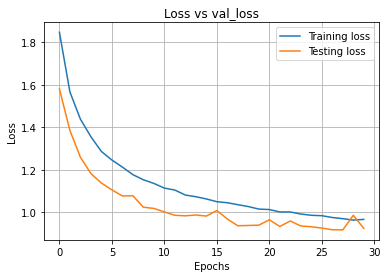

In [46]:
plt.plot(r1['Epoch'],r1['loss'],label='Training loss')
plt.plot(r1['Epoch'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs val_loss')
plt.legend()
plt.grid()
plt.show()

#### <i>Accuracy vs. val_accuracy on line chart.</i>

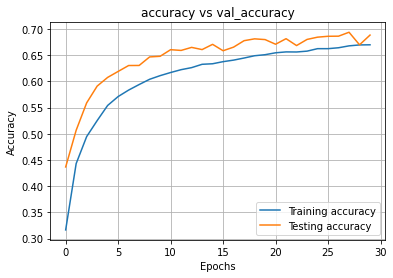

In [47]:
plt.plot(r1['Epoch'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epoch'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.title('accuracy vs val_accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## <center> <i>Predictions on test_data</i> 


In [48]:
x_test.shape

(10000, 32, 32, 1)

In [49]:
ypred = m1.predict(x_test)
print(ypred)

[[1.07508734e-01 3.25198658e-02 1.10425465e-01 ... 9.39937606e-02
  8.41562301e-02 6.10531271e-02]
 [8.56664255e-02 5.07382333e-01 2.66759275e-06 ... 9.85231807e-09
  3.85330051e-01 2.16178074e-02]
 [1.21009044e-01 4.89909612e-02 5.22919372e-02 ... 7.50099346e-02
  1.55609369e-01 1.15325399e-01]
 ...
 [2.77235667e-04 1.76442754e-05 6.76126778e-02 ... 1.72183141e-02
  2.73079786e-05 1.85938716e-05]
 [2.54010707e-01 8.31990764e-02 2.11824849e-01 ... 1.48707516e-02
  1.92892775e-02 6.91378303e-03]
 [2.04504587e-07 5.91821028e-08 3.97691729e-05 ... 9.98965025e-01
  1.93820737e-09 3.17940447e-07]]


In [50]:
print(y_test.shape)
print(ypred.shape)

(10000,)
(10000, 10)


In [51]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [52]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred]})
res1.head()

,y_test,y_pred
0,3,"[0.107508734, 0.032519866, 0.110425465, 0.2514..."
1,8,"[0.085666426, 0.50738233, 2.6675928e-06, 4.199..."
2,8,"[0.121009044, 0.04899096, 0.052291937, 0.21610..."
3,0,"[0.71779937, 0.00029873, 0.090564296, 0.000748..."
4,6,"[7.662764e-05, 0.0004655791, 0.02334465, 0.055..."


In [53]:
ypred_m1 = [np.argmax(i) for i in ypred]
for i in range (250):
    print(ypred_m1[i],end=" ")

3 1 3 0 6 6 7 6 3 1 3 9 1 7 9 8 5 2 8 6 7 0 4 9 4 3 3 0 9 6 2 5 4 5 9 3 7 1 9 5 4 6 5 6 0 9 3 5 7 6 9 0 7 6 8 8 5 5 5 5 7 5 6 2 4 6 1 2 5 7 0 6 8 8 9 2 2 3 3 8 8 1 1 7 2 7 3 2 9 9 0 3 8 6 4 6 6 0 0 7 4 5 6 3 1 1 2 6 8 7 4 0 0 2 1 3 0 4 3 5 8 0 1 2 8 0 0 3 2 2 4 1 9 9 1 3 9 7 4 0 6 5 6 5 8 7 6 5 5 3 8 9 6 0 2 5 2 9 6 4 2 1 6 6 8 4 8 6 6 0 9 9 8 8 9 9 6 7 3 0 0 5 2 2 5 8 2 3 5 0 5 8 0 7 7 4 8 8 7 3 5 1 8 7 1 3 0 5 7 9 5 9 5 9 8 0 0 9 0 2 7 3 9 4 3 9 2 0 5 3 5 1 3 8 8 0 4 9 3 3 1 1 1 9 0 3 1 8 4 2 

In [54]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred_m1]})
res1


,y_test,y_pred
0,3,3
1,8,1
2,8,3
3,0,0
4,6,6
...,...,...
9995,8,3
9996,3,5
9997,5,5
9998,1,4


In [55]:
m1.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9235 - accuracy: 0.6885


[0.9234678745269775, 0.6884999871253967]

<br><br>
#### <i> Confusion matrix and classification report</i>

In [56]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[724  17 100  31  23   2   5  29  34  35]
 [ 22 807   7  14  10   5  18  10  14  93]
 [ 62   6 549  90 110  81  41  47   6   8]
 [ 26   7 100 459  97 179  54  51  11  16]
 [ 20   2  64  73 685  36  34  75   6   5]
 [ 11   1  94 158  40 616  18  54   5   3]
 [ 11   6  56  94  57  28 728  10   4   6]
 [  5   2  39  28  55  66   5 777   2  21]
 [ 93  45  24  20  11  16  10  12 726  43]
 [ 22  52  15  30   6  12   7  24  18 814]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      1000
           1       0.85      0.81      0.83      1000
           2       0.52      0.55      0.54      1000
           3       0.46      0.46      0.46      1000
           4       0.63      0.69      0.65      1000
           5       0.59      0.62      0.60      1000
           6       0.79      0.73      0.76      1000
           7       0.71      0.78      0.74      1000
           8       0.88      0.73      0.80      1000
           9       0.78     